# 01.01 - PROYECTO KAGGLE

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [4]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

100% 20.1M/20.1M [00:00<00:00, 39.9MB/s]
100% 20.1M/20.1M [00:00<00:00, 35.3MB/s]


## unzip and inspect data

In [6]:
!unzip udea*.zip > /dev/null

In [7]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## load `train.csv` data with pandas



In [30]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 12)


In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


## Se usaran modelos utilizando dos columnas

- Se hara una prediccion para `RENDIMIENTO_GLOBAL` utilizando cada columna individual ademas de la columna `ESTU_VALORMATRICULAUNIVERSIDAD` para cada modelo.

In [96]:
 z1 = z[['FAMI_ESTRATOVIVIENDA', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
 z2 = z[['FAMI_TIENEINTERNET', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]
 z3 = z[['ESTU_HORASSEMANATRABAJA', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'RENDIMIENTO_GLOBAL']]

 print(z1.head())
 print(z2.head())
 print(z3.head())

  FAMI_ESTRATOVIVIENDA            ESTU_VALORMATRICULAUNIVERSIDAD  \
0            Estrato 3  Entre 5.5 millones y menos de 7 millones   
1            Estrato 3  Entre 2.5 millones y menos de 4 millones   
2            Estrato 3  Entre 2.5 millones y menos de 4 millones   
3            Estrato 4  Entre 4 millones y menos de 5.5 millones   
4            Estrato 3  Entre 2.5 millones y menos de 4 millones   

  RENDIMIENTO_GLOBAL  
0         medio-alto  
1               bajo  
2               bajo  
3               alto  
4         medio-bajo  
  FAMI_TIENEINTERNET            ESTU_VALORMATRICULAUNIVERSIDAD  \
0                 Si  Entre 5.5 millones y menos de 7 millones   
1                 No  Entre 2.5 millones y menos de 4 millones   
2                 Si  Entre 2.5 millones y menos de 4 millones   
3                 Si  Entre 4 millones y menos de 5.5 millones   
4                 Si  Entre 2.5 millones y menos de 4 millones   

  RENDIMIENTO_GLOBAL  
0         medio-alto  
1         

<Axes: xlabel='FAMI_ESTRATOVIVIENDA'>

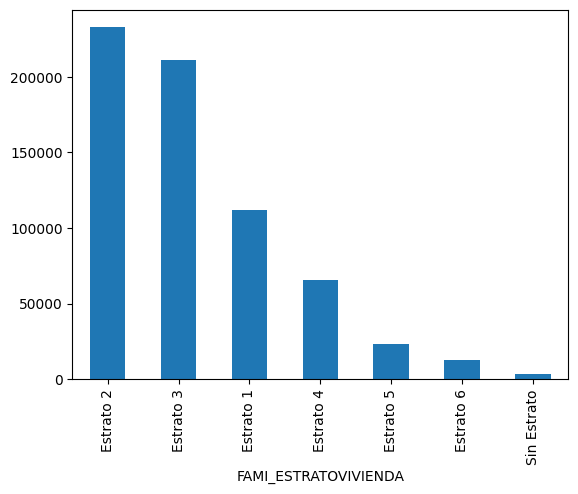

In [40]:
z1.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')

<Axes: xlabel='FAMI_TIENEINTERNET'>

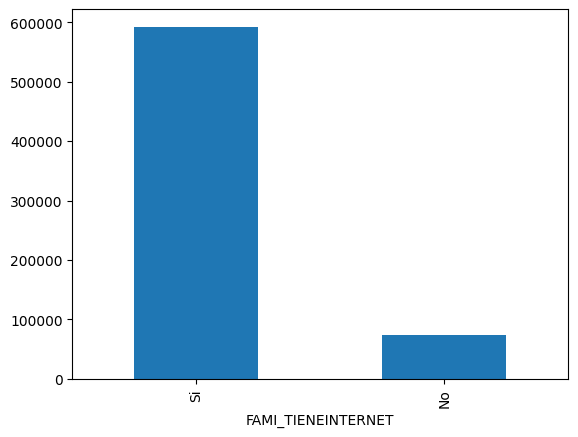

In [41]:
z2.FAMI_TIENEINTERNET.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

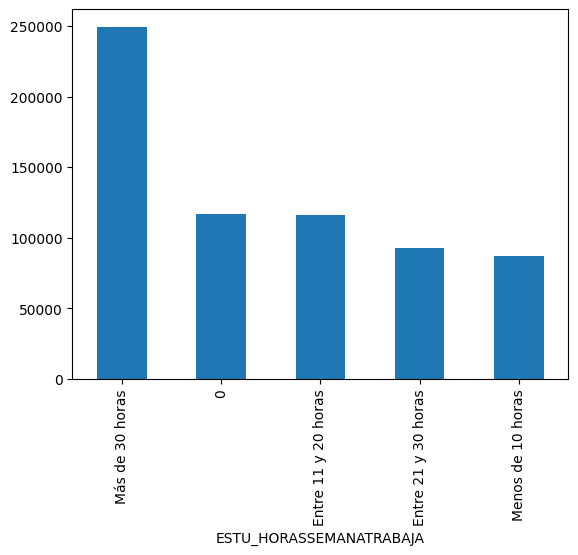

In [16]:
z3.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

<Axes: xlabel='ESTU_VALORMATRICULAUNIVERSIDAD'>

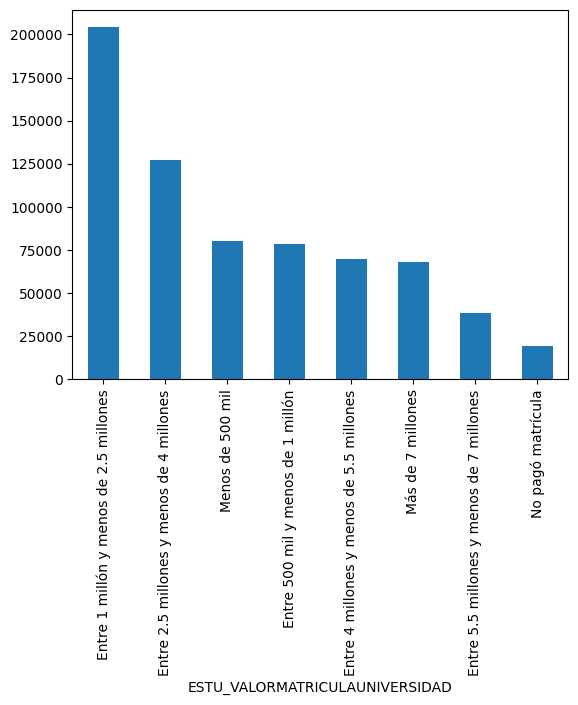

In [17]:
z1.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().plot(kind='bar')

## Inspect visually if these two columns have distinctive behaviour with respect to what we want to predict


Gráfica del rendimiento global de los estudiantes, con base en su estrato de vivienda.
Gráfica del rendimiento global de los estudiantes, con base en si tienen o no internet en la casa.
Gráfica del rendimiento global de los estudiantes, con base a la cantidad de horas que trabaja por semana.


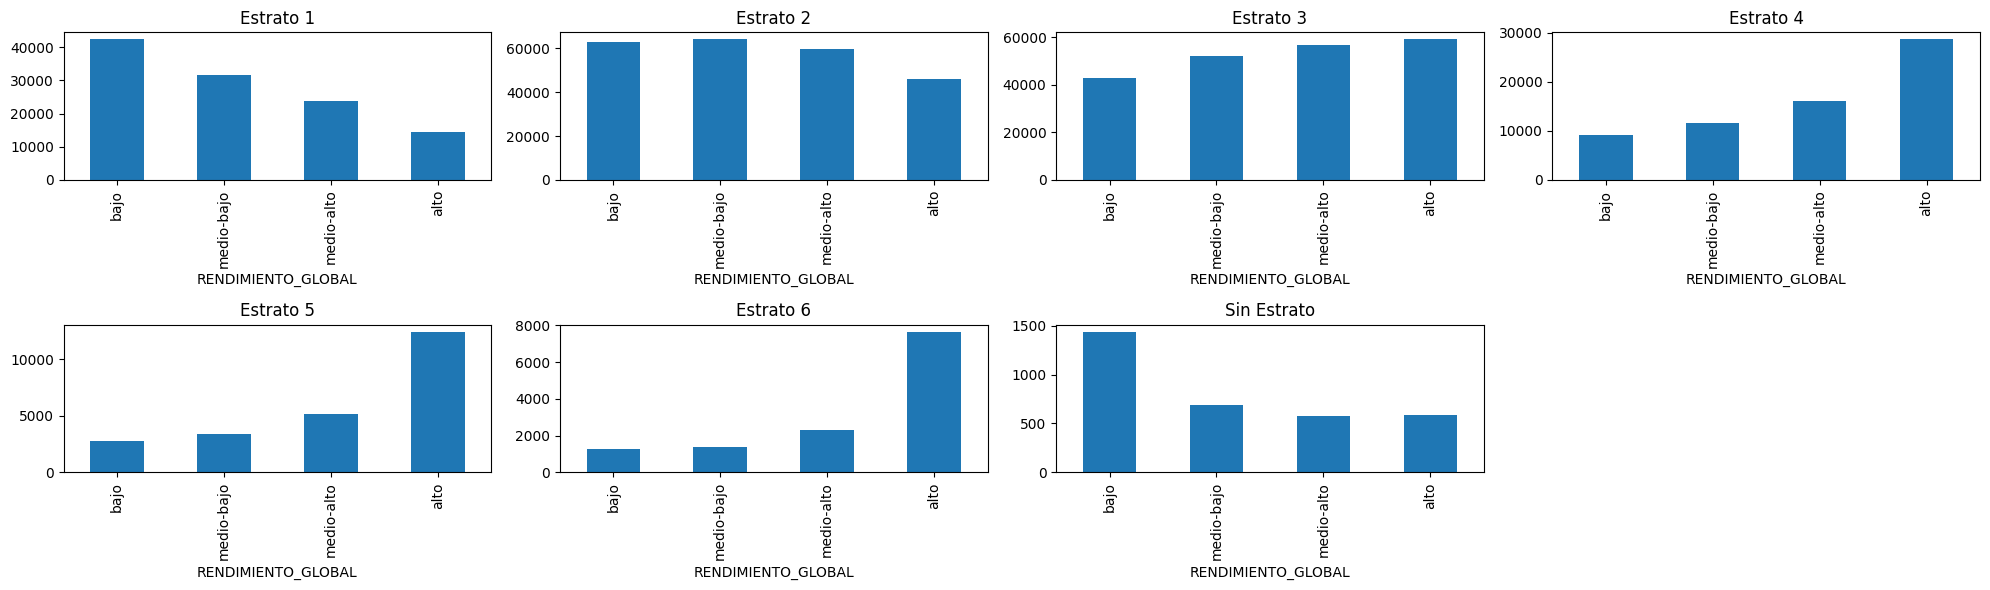

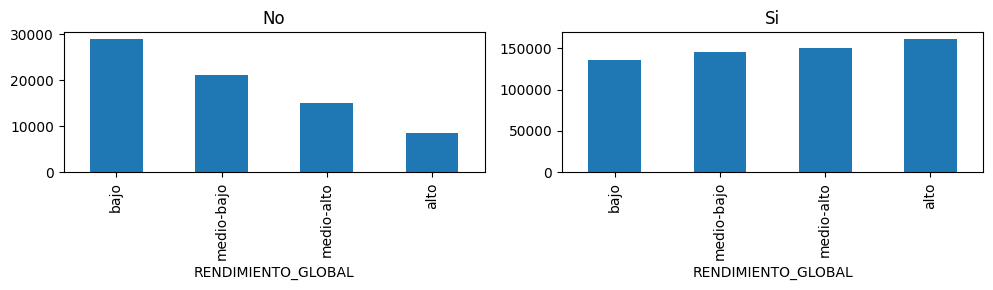

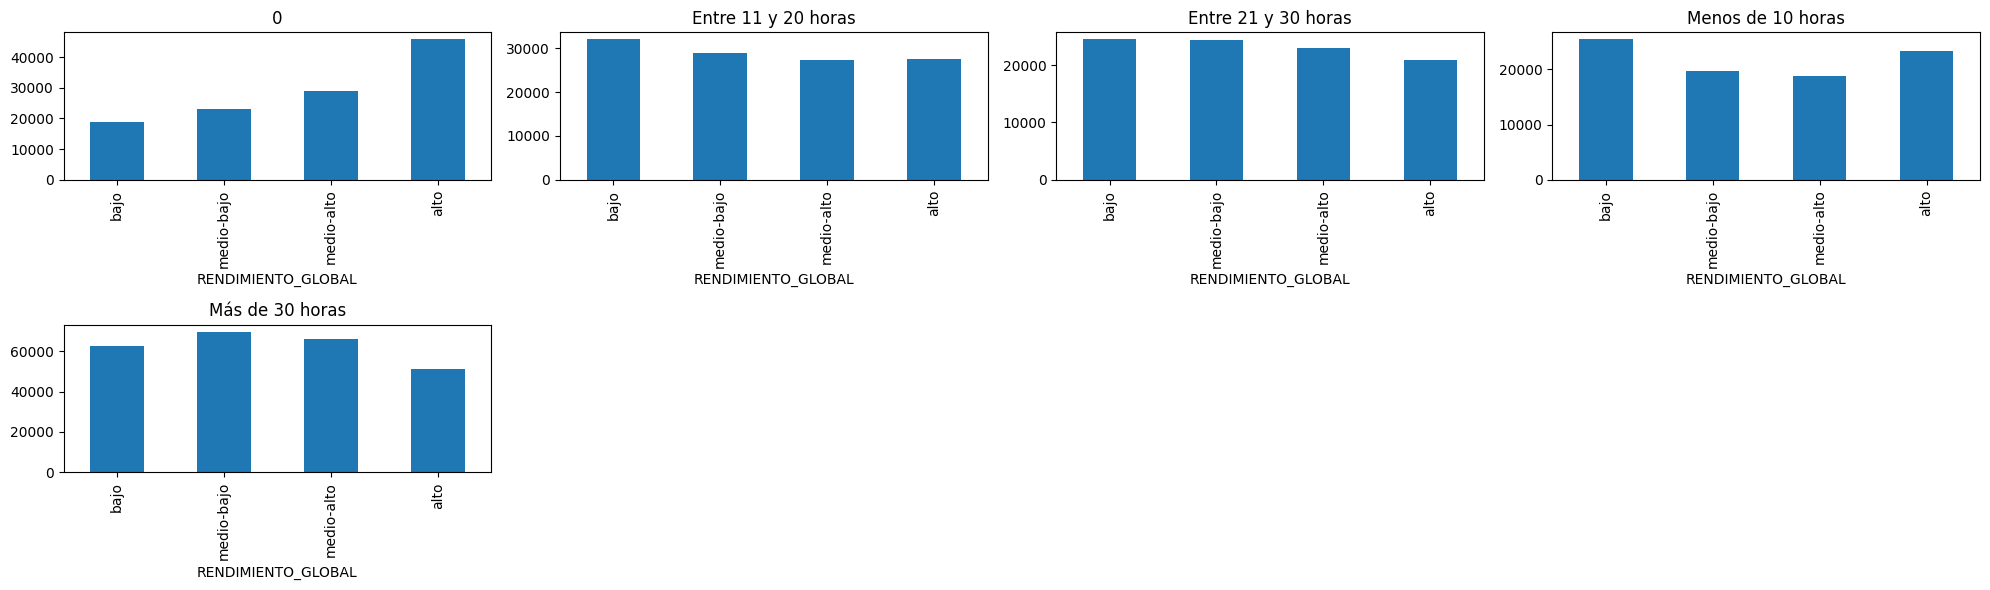

In [97]:
from rlxutils import subplots
import matplotlib.pyplot as plt

print()

print('Gráfica del rendimiento global de los estudiantes, con base en su estrato de vivienda.')

c = sorted(z1.FAMI_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=5):
    zc = z1[z1.FAMI_ESTRATOVIVIENDA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

print('Gráfica del rendimiento global de los estudiantes, con base en si tienen o no internet en la casa.')

d = sorted(z2.FAMI_TIENEINTERNET.value_counts().index)
for ax,ci in subplots(d, n_cols=4, usizex=5):
    zc = z2[z2.FAMI_TIENEINTERNET==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

print('Gráfica del rendimiento global de los estudiantes, con base a la cantidad de horas que trabaja por semana.')

e = sorted(z3.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(e, n_cols=4, usizex=5):
    zc = z3[z3.ESTU_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)






Cleanup de cada una de las variables de cada uno de los modelos

In [98]:
z1.FAMI_ESTRATOVIVIENDA.values[z1.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'

z1.ESTU_VALORMATRICULAUNIVERSIDAD.values[z1.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
z2.ESTU_VALORMATRICULAUNIVERSIDAD.values[z2.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
z3.ESTU_VALORMATRICULAUNIVERSIDAD.values[z3.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'


### Cleaning `ESTU_VALORMATRICULAUNIVERSIDAD`

we convert `ESTU_VALORMATRICULAUNIVERSIDAD` to a **continuous** value since the ordering makes sense and we would like models to have a chance to capture it.

observe we assign `no info` to -1, which is somewhat artificial in this case

In [99]:

estratomap = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': -1,
    'no info': -1
}

z1.FAMI_ESTRATOVIVIENDA = np.r_[[estratomap[i] for i in z1.FAMI_ESTRATOVIVIENDA]]

cmap = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': .250,
 'Entre 500 mil y menos de 1 millón': .75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1
}

z1.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in z1.ESTU_VALORMATRICULAUNIVERSIDAD]]
z2.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in z2.ESTU_VALORMATRICULAUNIVERSIDAD]]
z3.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in z3.ESTU_VALORMATRICULAUNIVERSIDAD]]

# z1.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()


<ipython-input-99-fc727a576e54>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1.FAMI_ESTRATOVIVIENDA = np.r_[[estratomap[i] for i in z1.FAMI_ESTRATOVIVIENDA]]
<ipython-input-99-fc727a576e54>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in z1.ESTU_VALORMATRICULAUNIVERSIDAD]]
<ipython-input-99-fc727a576e54>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [100]:
print(z3.ESTU_HORASSEMANATRABAJA.value_counts())

z2.FAMI_TIENEINTERNET = z2.FAMI_TIENEINTERNET.fillna('No')

tieneinternetmap = {
    'Si': 1,
    'No': 0
}

z2.FAMI_TIENEINTERNET = np.r_[[tieneinternetmap[i] for i in z2.FAMI_TIENEINTERNET]]


z3.ESTU_HORASSEMANATRABAJA = z3.ESTU_HORASSEMANATRABAJA.fillna('-1')

horastrabajamap = {
   'Más de 30 horas': 30,
   '0': 0,
   '-1': -1,
   'Entre 11 y 20 horas': 15,
   'Entre 21 y 30 horas': 25,
   'Menos de 10 horas': 10,
}

z3.ESTU_HORASSEMANATRABAJA = np.r_[[horastrabajamap[i] for i in z3.ESTU_HORASSEMANATRABAJA]]



ESTU_HORASSEMANATRABAJA
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64


<ipython-input-100-ba01d72cb71f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z2.FAMI_TIENEINTERNET = z2.FAMI_TIENEINTERNET.fillna('No')
<ipython-input-100-ba01d72cb71f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z2.FAMI_TIENEINTERNET = np.r_[[tieneinternetmap[i] for i in z2.FAMI_TIENEINTERNET]]
<ipython-input-100-ba01d72cb71f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
# z = z.copy()
# z.ESTU_VALORMATRICULAUNIVERSIDAD.values[z.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
# z.FAMI_EDUCACIONMADRE = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in z.FAMI_EDUCACIONMADRE.values]

In [101]:
print(z1.FAMI_ESTRATOVIVIENDA.value_counts())
print()
print(z2.FAMI_TIENEINTERNET.value_counts())
print()
print(z3.ESTU_HORASSEMANATRABAJA.value_counts())


FAMI_ESTRATOVIVIENDA
 2    232671
 3    210685
 1    111991
 4     65514
-1     35426
 5     23608
 6     12605
Name: count, dtype: int64

FAMI_TIENEINTERNET
1    592514
0     99986
Name: count, dtype: int64

ESTU_HORASSEMANATRABAJA
 30    249352
 0     116550
 15    115857
 25     92693
 10     87191
-1      30857
Name: count, dtype: int64


first we create the onehot mapping

In [102]:
a = z1.FAMI_ESTRATOVIVIENDA.values
print(np.unique(a))
FAMI_ESTRATOVIVIENDA_vals = sorted(np.unique(a))
FAMI_ESTRATOVIVIENDA_onehot_vals = {val: np.eye(len(FAMI_ESTRATOVIVIENDA_vals))[i] for i,val in enumerate(FAMI_ESTRATOVIVIENDA_vals)}
FAMI_ESTRATOVIVIENDA_onehot_vals

b = z2.FAMI_TIENEINTERNET.values
FAMI_TIENEINTERNET_vals = sorted(np.unique(b))
FAMI_TIENEINTERNET_onehot_vals = {val: np.eye(len(FAMI_TIENEINTERNET_vals))[i] for i,val in enumerate(FAMI_TIENEINTERNET_vals)}
FAMI_TIENEINTERNET_onehot_vals

c = z3.ESTU_HORASSEMANATRABAJA.values
ESTU_HORASSEMANATRABAJA_vals = sorted(np.unique(c))
ESTU_HORASSEMANATRABAJA_onehot_vals = {val: np.eye(len(ESTU_HORASSEMANATRABAJA_vals))[i] for i,val in enumerate(ESTU_HORASSEMANATRABAJA_vals)}
ESTU_HORASSEMANATRABAJA_onehot_vals

[-1  1  2  3  4  5  6]


{-1: array([1., 0., 0., 0., 0., 0.]),
 0: array([0., 1., 0., 0., 0., 0.]),
 10: array([0., 0., 1., 0., 0., 0.]),
 15: array([0., 0., 0., 1., 0., 0.]),
 25: array([0., 0., 0., 0., 1., 0.]),
 30: array([0., 0., 0., 0., 0., 1.])}

In [103]:
FAMI_ESTRATOVIVIENDA_onehot_enc = np.r_[[FAMI_ESTRATOVIVIENDA_onehot_vals[i] for i in z1.FAMI_ESTRATOVIVIENDA]]
FAMI_ESTRATOVIVIENDA_onehot_enc

FAMI_TIENEINTERNET_onehot_enc = np.r_[[FAMI_TIENEINTERNET_onehot_vals[i] for i in z2.FAMI_TIENEINTERNET]]
FAMI_TIENEINTERNET_onehot_enc

ESTU_HORASSEMANATRABAJA_onehot_enc = np.r_[[ESTU_HORASSEMANATRABAJA_onehot_vals[i] for i in z3.ESTU_HORASSEMANATRABAJA]]
ESTU_HORASSEMANATRABAJA_onehot_enc

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [104]:
FAMI_ESTRATOVIVIENDA_df = pd.DataFrame(FAMI_ESTRATOVIVIENDA_onehot_enc, columns=[f"FAMI_ESTRATOVIVIENDA__{v}" for v in FAMI_ESTRATOVIVIENDA_onehot_vals])
FAMI_ESTRATOVIVIENDA_df

FAMI_TIENEINTERNET_df = pd.DataFrame(FAMI_TIENEINTERNET_onehot_enc, columns=[f"FAMI_TIENEINTERNET__{v}" for v in FAMI_TIENEINTERNET_onehot_vals])
FAMI_TIENEINTERNET_df

ESTU_HORASSEMANATRABAJA_df = pd.DataFrame(ESTU_HORASSEMANATRABAJA_onehot_enc, columns=[f"ESTU_HORASSEMANATRABAJA__{v}" for v in ESTU_HORASSEMANATRABAJA_onehot_vals])
ESTU_HORASSEMANATRABAJA_df

,ESTU_HORASSEMANATRABAJA__-1,ESTU_HORASSEMANATRABAJA__0,ESTU_HORASSEMANATRABAJA__10,ESTU_HORASSEMANATRABAJA__15,ESTU_HORASSEMANATRABAJA__25,ESTU_HORASSEMANATRABAJA__30
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
692495,0.0,0.0,0.0,1.0,0.0,0.0
692496,0.0,0.0,0.0,0.0,0.0,1.0
692497,0.0,0.0,1.0,0.0,0.0,0.0
692498,0.0,0.0,1.0,0.0,0.0,0.0


and we assemble everything into a single dataframe, removing the original `FAMI_EDUCACIONMADRE` column.

we now have 13 columns ... why?


In [105]:
z1 = pd.concat([FAMI_ESTRATOVIVIENDA_df, z1], axis=1).drop('FAMI_ESTRATOVIVIENDA', axis=1)
z1.shape

z2 = pd.concat([FAMI_TIENEINTERNET_df, z2], axis=1).drop('FAMI_TIENEINTERNET', axis=1)
z2.shape

z3 = pd.concat([ESTU_HORASSEMANATRABAJA_df, z3], axis=1).drop('ESTU_HORASSEMANATRABAJA', axis=1)
z3.shape

(692500, 8)

In [107]:
z1.head()
z2.head()
z3.head()

,ESTU_HORASSEMANATRABAJA__-1,ESTU_HORASSEMANATRABAJA__0,ESTU_HORASSEMANATRABAJA__10,ESTU_HORASSEMANATRABAJA__15,ESTU_HORASSEMANATRABAJA__25,ESTU_HORASSEMANATRABAJA__30,ESTU_VALORMATRICULAUNIVERSIDAD,RENDIMIENTO_GLOBAL
0,0.0,0.0,1.0,0.0,0.0,0.0,6.25,medio-alto
1,0.0,1.0,0.0,0.0,0.0,0.0,3.25,bajo
2,0.0,0.0,0.0,0.0,0.0,1.0,3.25,bajo
3,0.0,1.0,0.0,0.0,0.0,0.0,4.75,alto
4,0.0,0.0,0.0,0.0,1.0,0.0,3.25,medio-bajo


## convert target (prediction) column into discrete values

now everything in our dataset is **numeric**!!!

In [108]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = [rmap[i] for i in z[y_col]]
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,2
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,1


## build `X` and `y` for training a model

observe we sort columns to make sure we always get the same ordering

In [109]:
z1 = z1[sorted(z1.columns)]

X1 = z1[[a for a in z1.columns if a!=y_col]].values
y1 = z1[y_col].values
X1.shape, y1.shape

z2 = z2[sorted(z2.columns)]

X2 = z2[[b for b in z2.columns if b!=y_col]].values
y2 = z2[y_col].values
X2.shape, y2.shape

z3 = z3[sorted(z3.columns)]

X3 = z3[[c for c in z3.columns if c!=y_col]].values
y3 = z3[y_col].values
X3.shape, y3.shape


((692500, 7), (692500,))

## split into train and test

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
Xtr1, Xts1, ytr1, yts1 = train_test_split(X1,y1, train_size=0.8)
Xtr1.shape, Xts1.shape, ytr1.shape, yts1.shape

Xtr2, Xts2, ytr2, yts2 = train_test_split(X2,y2, train_size=0.8)
Xtr2.shape, Xts2.shape, ytr2.shape, yts2.shape

Xtr3, Xts3, ytr3, yts3 = train_test_split(X3,y3, train_size=0.8)
Xtr3.shape, Xts3.shape, ytr3.shape, yts3.shape

((554000, 7), (138500, 7), (554000,), (138500,))

## Make a linear model for classification

train model

In [112]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression()
lr1.fit(Xtr1, ytr1)

lr2 = LogisticRegression()
lr2.fit(Xtr2, ytr2)

lr3 = LogisticRegression()
lr3.fit(Xtr3, ytr3)


# lr = LogisticRegression()
# lr.fit(Xtr, ytr)

LogisticRegression()

get predictions

In [113]:
preds_tr1 = lr1.predict(Xtr1)
preds_ts1 = lr1.predict(Xts1)

preds_tr2 = lr2.predict(Xtr2)
preds_ts2 = lr2.predict(Xts2)


preds_tr3 = lr3.predict(Xtr3)
preds_ts3 = lr3.predict(Xts3)

In [114]:
print (preds_tr1[:10])
print (preds_ts1[:10])

print (preds_tr2[:10])
print (preds_ts2[:10])

print (preds_tr3[:10])
print (preds_ts3[:10])

['medio-alto' 'bajo' 'bajo' 'bajo' 'bajo' 'bajo' 'bajo' 'bajo' 'bajo'
 'medio-alto']
['bajo' 'medio-bajo' 'alto' 'bajo' 'bajo' 'bajo' 'bajo' 'alto' 'alto'
 'bajo']
['medio-bajo' 'alto' 'medio-bajo' 'alto' 'alto' 'bajo' 'alto' 'alto'
 'bajo' 'alto']
['alto' 'bajo' 'bajo' 'medio-bajo' 'alto' 'bajo' 'bajo' 'alto' 'alto'
 'alto']
['alto' 'medio-alto' 'medio-bajo' 'alto' 'medio-bajo' 'bajo' 'bajo' 'bajo'
 'bajo' 'alto']
['bajo' 'bajo' 'bajo' 'bajo' 'bajo' 'medio-alto' 'bajo' 'bajo'
 'medio-alto' 'medio-bajo']


get accuracy and confusion matrices

In [120]:
print(np.mean(preds_tr1==ytr1), np.mean(preds_ts1==yts1))

print(np.mean(preds_tr2==ytr2), np.mean(preds_ts2==yts2))

print(np.mean(preds_tr3==ytr3), np.mean(preds_ts3==yts3))

0.34143682310469314 0.3402960288808664
0.3145523465703971 0.31576895306859204
0.3346696750902527 0.33414440433212994


In [117]:
from sklearn.metrics import confusion_matrix

In [118]:
cm_tr1 = confusion_matrix(ytr1, preds_tr1)
cm_ts1 = confusion_matrix(yts1, preds_ts1)

cm_tr2 = confusion_matrix(ytr2, preds_tr2)
cm_ts2 = confusion_matrix(yts2, preds_ts2)

cm_tr3 = confusion_matrix(ytr3, preds_tr3)
cm_ts3 = confusion_matrix(yts3, preds_ts3)

# normalize by class
cm_tr1 = cm_tr1 / cm_tr1.sum(axis=1).reshape(-1,1)
cm_ts1 = cm_ts1 / cm_ts1.sum(axis=1).reshape(-1,1)

cm_tr2 = cm_tr2 / cm_tr2.sum(axis=1).reshape(-1,1)
cm_ts2 = cm_ts2 / cm_ts2.sum(axis=1).reshape(-1,1)

cm_tr3 = cm_tr3 / cm_tr3.sum(axis=1).reshape(-1,1)
cm_ts3 = cm_ts3 / cm_ts3.sum(axis=1).reshape(-1,1)

observe how each row in the confusion matrix adds up to 1. What does this mean?

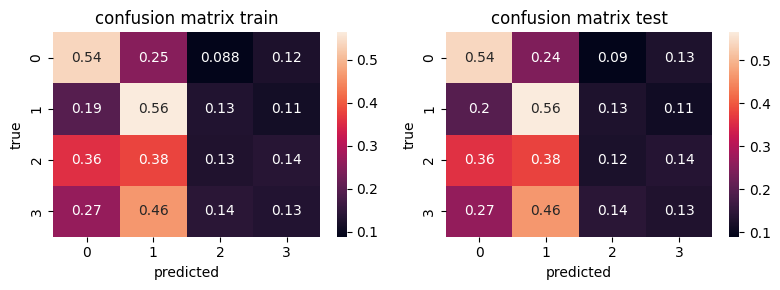

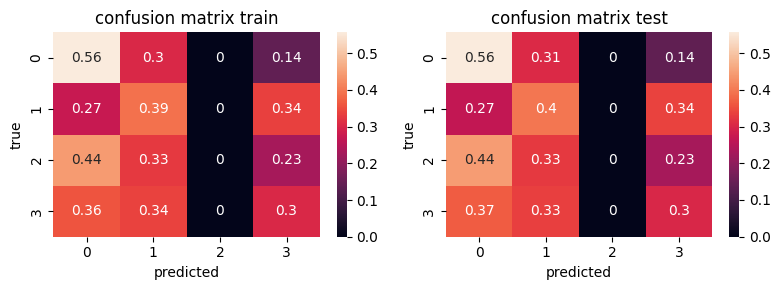

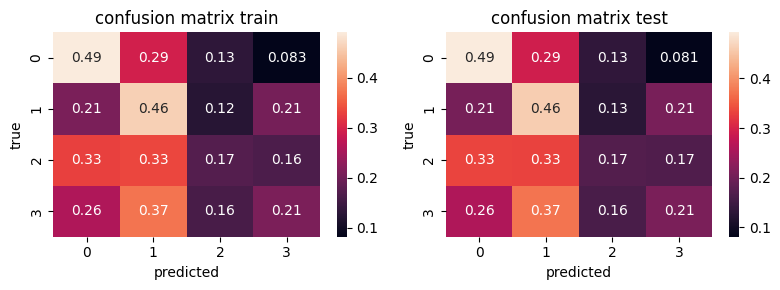

In [119]:
import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr1, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts1, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")


for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr2, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts2, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")


for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr3, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts3, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

In [122]:
zt = pd.read_csv("test.csv")
zt

,Unnamed: 0,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO
0,0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Primaria completa,Si
1,1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Técnica o tecnológica completa,No
2,2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,No
3,3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Primaria incompleta,No
4,4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No
...,...,...,...,...,...,...,...,...,...,...,...,...
296781,296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Primaria incompleta,Si
296782,296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Educación profesional completa,No
296783,296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Educación profesional completa,No
296784,296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Educación profesional completa,No


In [124]:
zt_ids = zt['ID'].values
zt = zt[['FAMI_ESTRATOVIVIENDA', 'ESTU_VALORMATRICULAUNIVERSIDAD']]
print ("shape of loaded dataframe", zt.shape)
zt.head()

shape of loaded dataframe (296786, 2)


,FAMI_ESTRATOVIVIENDA,ESTU_VALORMATRICULAUNIVERSIDAD
0,Estrato 3,Menos de 500 mil
1,Estrato 2,Entre 2.5 millones y menos de 4 millones
2,Estrato 3,Entre 1 millón y menos de 2.5 millones
3,Estrato 1,Entre 1 millón y menos de 2.5 millones
4,Estrato 2,Entre 2.5 millones y menos de 4 millones


In [125]:
zt.FAMI_ESTRATOVIVIENDA.values[zt.FAMI_ESTRATOVIVIENDA.isna()] = 'no info'
zt.ESTU_VALORMATRICULAUNIVERSIDAD.values[zt.ESTU_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'


In [126]:
zt = zt.copy()
zt.ESTU_VALORMATRICULAUNIVERSIDAD = np.r_[[cmap[i] for i in zt.ESTU_VALORMATRICULAUNIVERSIDAD]]


In [129]:
# zt.FAMI_ESTRATOVIVIENDA = ['no info' if i in ['No sabe', 'No Aplica'] else i for i in zt.FAMI_ESTRATOVIVIENDA.values]

estratomap = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6,
    'Sin Estrato': -1,
    'no info': -1
}

zt.FAMI_ESTRATOVIVIENDA = np.r_[[estratomap[i] for i in zt.FAMI_ESTRATOVIVIENDA]]

FAMI_ESTRATOVIVIENDA = np.r_[[FAMI_ESTRATOVIVIENDA_onehot_vals[i] for i in zt.FAMI_ESTRATOVIVIENDA]]
FAMI_ESTRATOVIVIENDA = pd.DataFrame(FAMI_ESTRATOVIVIENDA_onehot_enc, columns=[f"FAMI_ESTRATOVIVIENDA__{v}" for v in FAMI_ESTRATOVIVIENDA_onehot_vals])
zt = pd.concat([FAMI_ESTRATOVIVIENDA, zt], axis=1).drop('FAMI_ESTRATOVIVIENDA', axis=1)
zt.shape

(692500, 8)

In [ ]:
zt

,FAMI_EDUCACIONMADRE__Educación profesional completa,FAMI_EDUCACIONMADRE__Educación profesional incompleta,FAMI_EDUCACIONMADRE__Ninguno,FAMI_EDUCACIONMADRE__Postgrado,FAMI_EDUCACIONMADRE__Primaria completa,FAMI_EDUCACIONMADRE__Primaria incompleta,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE__Técnica o tecnológica completa,FAMI_EDUCACIONMADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONMADRE__no info,ESTU_VALORMATRICULAUNIVERSIDAD
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.25
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.75
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.75
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...
296781,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25
296782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.75
296783,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.25
296784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.25


create `X` array and predict

In [135]:
X_test_data = zt[sorted(zt.columns)].values

X_test_data.shape

(692500, 8)

In [140]:
lr1 = LogisticRegression()
lr1.fit(Xtr1, ytr1)

preds_test_data = lr1.predict(X_test_data)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## prepare submission

first, map back the predictions to textual values

In [ ]:
# inverse mapping
rmapi = {v:k for k,v in rmap.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]


In [ ]:
# create dataframe

submission = pd.DataFrame([zt_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,bajo
1,98545,alto
2,499179,medio-bajo
3,782980,bajo
4,785185,medio-alto
...,...,...
296781,496981,bajo
296782,209415,alto
296783,239074,alto
296784,963852,alto


In [ ]:
# save to file ready to submit
submission.to_csv("my_submission.csv", index=False)

In [ ]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,bajo
98545,alto
499179,medio-bajo
782980,bajo
785185,medio-alto
58495,medio-bajo
705444,medio-alto
557548,alto
519909,medio-bajo


In [ ]:
submission.shape

(296786, 2)

## Send your submission to Kaggle

You must **join the competition** first

In [ ]:
!kaggle competitions submit -c udea-ai4eng-20242 -f my_submission.csv -m "raul ramos submission with linear model"

100% 3.88M/3.88M [00:00<00:00, 5.57MB/s]
Successfully submitted to UDEA/ai4eng 20242 - Pruebas Saber Pro Colombia

## Things you can try

- other models (svm, random forest, gaussian, etc.)
- different parameters in the models (like `gamma` for svm, or `max_depth` for random forests). see the doc of each model in `sklearn`.
- use different preprocessing and cleaning methods for different columns
- create new columns manually, for instance,
    - group `ESTU_PRGM_ACADEMICO` into areas of knowlege (engineering, social sciences, etc.)
    - do some operation between columns (multiply, concatenate, etc.)
- integrate external data as new columns, for instance, economic data from each department in Colombia, for each different year, etc.
